In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.kernel_approximation import PolynomialCountSketch, RBFSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

import pandas as pd
import numpy as np

data = pd.read_csv("donnees/caracteristiques2-2019.csv")
data = data.drop("Unnamed: 0",axis=1)
data

,Num_Acc,jour,mois,hrmn,lum,dep,com,agg,atm,weekday,time,grav
0,201900000001,30,11,01:30,4,93,93053,1,1,5,1.500000,2
1,201900000002,30,11,02:50,3,93,93066,1,1,5,2.833333,2
2,201900000003,28,11,15:15,1,92,92036,1,1,3,15.250000,2
3,201900000004,30,11,20:20,5,94,94069,1,1,5,20.333333,2
4,201900000005,30,11,04:00,3,94,94028,1,1,5,4.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
58834,201900058836,30,11,09:00,1,69,69288,1,5,5,9.000000,2
58835,201900058837,27,11,07:50,1,67,67482,1,8,2,7.833333,2
58836,201900058838,30,11,02:41,4,94,94021,1,1,5,2.683333,2
58837,201900058839,30,11,15:20,1,78,78640,1,1,5,15.333333,3


In [45]:
num_attribs=["time"]
cat_attribs=["atm","lum","weekday"]

num_pipeline = Pipeline([
    ('std_scaler',StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", 'passthrough', num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

def learning(pipeline):
    ac_score = []

    skf = StratifiedKFold(n_splits=50)

    for train_index, test_index in skf.split(data,data["grav"]):
        print("*")
        data_train, data_test = data.loc[train_index], data.loc[test_index]

        X_train = pipeline.fit_transform(data_train)
        y_train = np.array(data_train["grav"])

        X_test = pipeline.transform(data_test)
        y_test = np.array(data_test["grav"])

        # model = SGDClassifier(max_iter=1000, loss="hinge")
        model = SGDClassifier(max_iter=1000, loss="hinge")
        model.fit(X_train.toarray(), y_train)
        ac_score.append(accuracy_score(y_test, model.predict(X_test.toarray())))

    print("*****************")
    print("Precision moyenne : ", np.mean(ac_score))
    return np.mean(ac_score)


In [46]:
learning(full_pipeline)

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*****************
Precision moyenne :  0.6383014726706315


0.6383014726706315

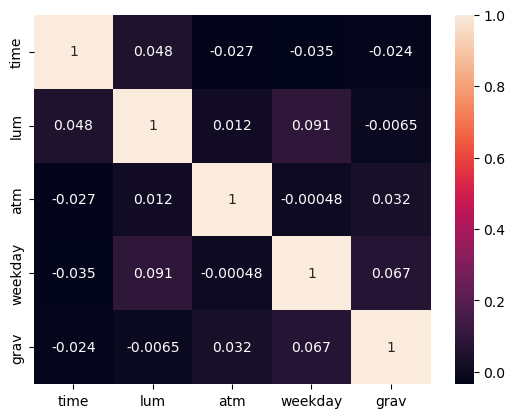

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(data,columns=['time','lum','atm','weekday','grav'])

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()